# Analisis Bike Sharing

- Kelompok : IF2-10123077
- Anggota : </br>
10123054  - Gilang Ragil Santoso </br>
10123059  - Labib Jizdan Muzzaki </br>
10123060  - Jey Nintho Mahata </br>
10123077  - Fachri Nayan Ramadhan </br>
10123079  - Hilman Cahya Wiguna </br>
10123083  - Putra Abdillah Al Fajri</br>



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Pengolahan Data Bike Sharing

In [6]:
day_df = pd.read_csv("data/cleaned_day.csv")
hour_df = pd.read_csv("data/cleaned_hour.csv")

data = pd.read_csv("day.csv")
data2 = pd.read_csv("hour.csv")

data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
data2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Cleaning Data

In [10]:
def create_monthly_count_df(df):
    df["mnth"] = pd.Categorical(df["mnth"], categories=[
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

    monthly_count = df.groupby(by=["mnth","yr"], observed=True).agg({
        "cnt": "sum"
    }).reset_index()

    return monthly_count

In [11]:
# Mengubah Angka Menjadi Nama
season_names = ['Semi', 'Dingin', 'Panas', 'Gugur']

# Mengubah nilai season menjadi nama musim
season_mapping = {1: 'Semi', 2: 'Dingin', 3: 'Panas', 4: 'Gugur'}
data['season'] = data['season'].map(season_mapping)

# Nama bulan
month_names = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]

## 1. Analisis Jumlah Pelanggan Pada Tahun 2011 Sampai 2012

In [30]:
def create_monthly_count_df(df):
    df["mnth"] = pd.Categorical(df["mnth"], categories=[
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

    monthly_count = df.groupby(by=["mnth","yr"], observed=False).agg({
        "cnt": "sum"
    }).reset_index()

    return monthly_count

datetime_columns = ["dteday"]
day_df.sort_values(by="instant", inplace=True)
day_df.reset_index(inplace=True)

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

min_date = day_df["dteday"].min()
max_date = day_df["dteday"].max()


In [31]:
monthly_count = create_monthly_count_df(day_df)

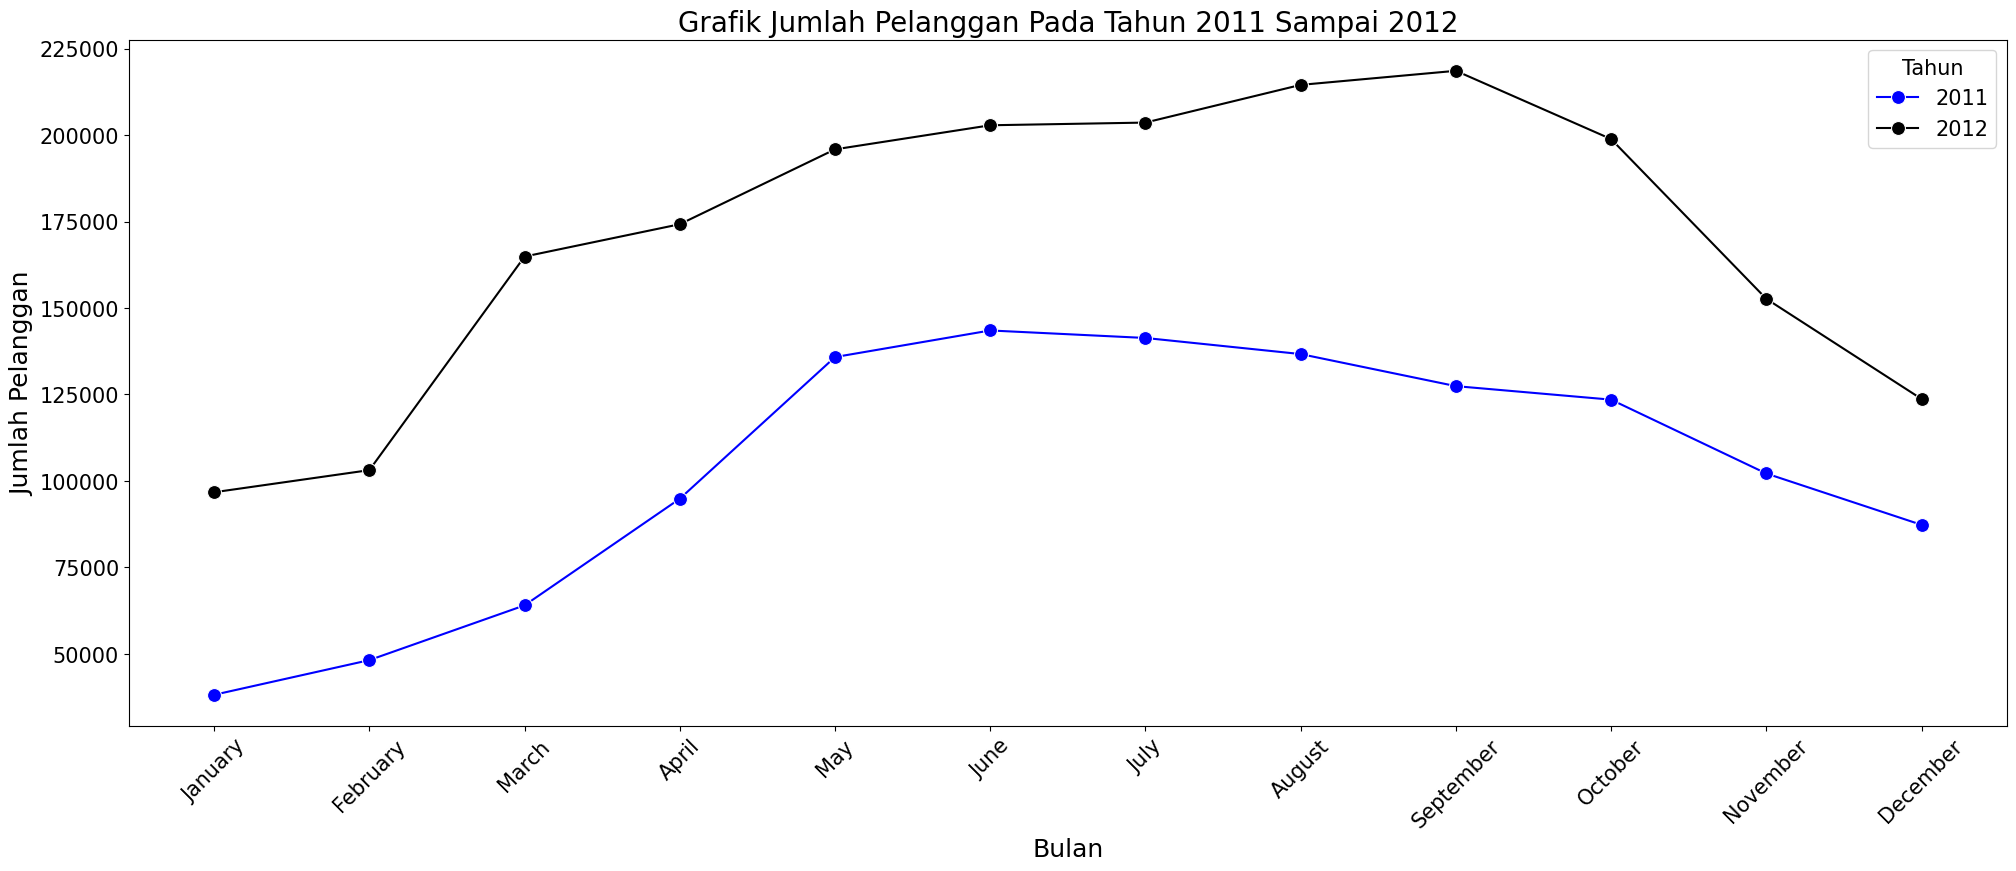

'Dilihat dari grafik total pengguna sepeda pada tahun 2011. pada bulan januari memiliki pengguna dengan jumlah lebih 100.000 dengan setiap bulan nya meningkat drastis sampai di bulan september dengan jumlah pengguna mencapai lebih dari 200.000, lalu mengalami penurunan pada bulan bulan selanjutnya hingga pada bulan desember mencapai kurang lebih 125.000 pengguna dan pada awal tahun di 2012 di bulan januari kurang dari 50.000 pengguna. lalu di bulan selanjutnya mengalami kenaikan pada bulan Juni hingga lebih dari 125.000 pengguna dan mengalami penurunan kembali di bulan Juli, Agustus, September, November dan pada bulan December mencapai Kurang lebih dari 75.000 pengguna.'

In [32]:
# Membuat plot dengan ukuran gambar yang ditentukan
fig, ax = plt.subplots(figsize=(20, 8))

# Mendefinisikan warna untuk setiap tahun
colors = {2011: 'blue', 2012: 'black'}

sns.lineplot(
    data=monthly_count,
    x="mnth",
    y="cnt",
    hue="yr",
    palette=colors,  # Menggunakan warna yang ditentukan sebelumnya
    marker="o",
    markersize=10
)

ax.set_title("Grafik Jumlah Pelanggan Pada Tahun 2011 Sampai 2012", fontsize=20)
ax.set_xlabel('Bulan', fontsize=18)
ax.set_ylabel('Jumlah Pelanggan', fontsize=18)
legend = ax.legend(title="Tahun", loc="upper right", fontsize=15)
legend.get_title().set_fontsize('15')
plt.tight_layout()
ax.tick_params(axis='x', labelrotation=45, labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

display('Dilihat dari grafik total pengguna sepeda pada tahun 2011. pada bulan januari memiliki pengguna dengan jumlah lebih 100.000 dengan setiap bulan nya meningkat drastis sampai di bulan september dengan jumlah pengguna mencapai lebih dari 200.000, lalu mengalami penurunan pada bulan bulan selanjutnya hingga pada bulan desember mencapai kurang lebih 125.000 pengguna dan pada awal tahun di 2012 di bulan januari kurang dari 50.000 pengguna. lalu di bulan selanjutnya mengalami kenaikan pada bulan Juni hingga lebih dari 125.000 pengguna dan mengalami penurunan kembali di bulan Juli, Agustus, September, November dan pada bulan December mencapai Kurang lebih dari 75.000 pengguna.') 


## 2. Analisis Pengguna Sepeda Per Musim Pada 2011 dan 2012

In [15]:
total_by_season = [471348, 731239, 1061129, 528390]
# Menghitung Total Penyewaan Per Musim
total_by_season = data.groupby('season')['cnt'].sum().sort_values()

In [16]:
data_penyewaan = pd.DataFrame({
    'MUSIM' : season_names,
    'JUMLAH' : total_by_season
})

display(data_penyewaan)  # Menampilkan dataframe dalam Jupyter Notebook

,MUSIM,JUMLAH
season,,
Semi,Semi,471348
Gugur,Dingin,841613
Dingin,Panas,918589
Panas,Gugur,1061129


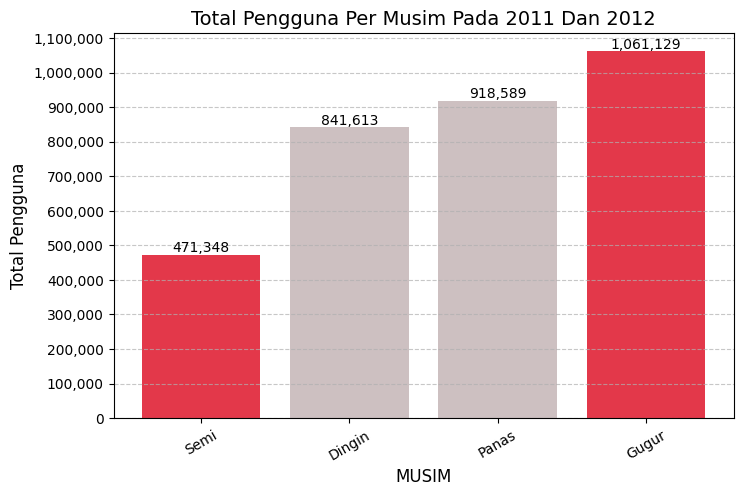

'Dilihat dari grafik total pengguna per Musim, Terlihat Bahwa Pengguna Tertinggi Terjadi Pada Musim Gugur Dengan Jumlah 1.061.129 Pengguna. dan Pengguna Terendah Terjadi Pada Musim Semi Dengan Jumlah 471.348 Pengguna'

In [17]:
# Membuat bar plot dengan sumbu Y yang lebih jelas
plt.figure(figsize=(8, 5))
bars = plt.bar(season_names, total_by_season, color=['#e3384a', '#cdc0c1', '#cdc0c1', '#e3384a'])

# Menambahkan label angka di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=10)

plt.title('Total Pengguna Per Musim Pada 2011 Dan 2012', fontsize=14)
plt.xlabel('MUSIM', fontsize=12)
plt.ylabel('Total Pengguna', fontsize=12)
plt.xticks(fontsize=10, rotation=30)  # Rotasi label sumbu X
plt.yticks(range(0, int(max(total_by_season)) + 100000, 100000), 
           [f'{x:,}' for x in range(0, int(max(total_by_season)) + 100000, 100000)], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Penjelasan Penyewaan Sepeda Setiap Musim
display("Dilihat dari grafik total pengguna per Musim, Terlihat Bahwa Pengguna Tertinggi Terjadi Pada Musim Gugur Dengan Jumlah 1.061.129 Pengguna. dan Pengguna Terendah Terjadi Pada Musim Semi Dengan Jumlah 471.348 Pengguna")


## 3. Analisis Pengguna Registered dan Casual Berdasarkan Musim

In [18]:
# Menghitung total penyewa berdasarkan jenis dan musim
total_season = data.groupby('season')[['registered', 'casual']].sum()

In [19]:
# Mengganti nama kolom pada DataFrame
total_season.rename(columns={"registered": "Registered", "casual": "Casual"}, inplace=True)
# Menampilkan tabel total penyewa
display(total_season)

,Registered,Casual
season,,
Dingin,715067,203522
Gugur,711831,129782
Panas,835038,226091
Semi,410726,60622


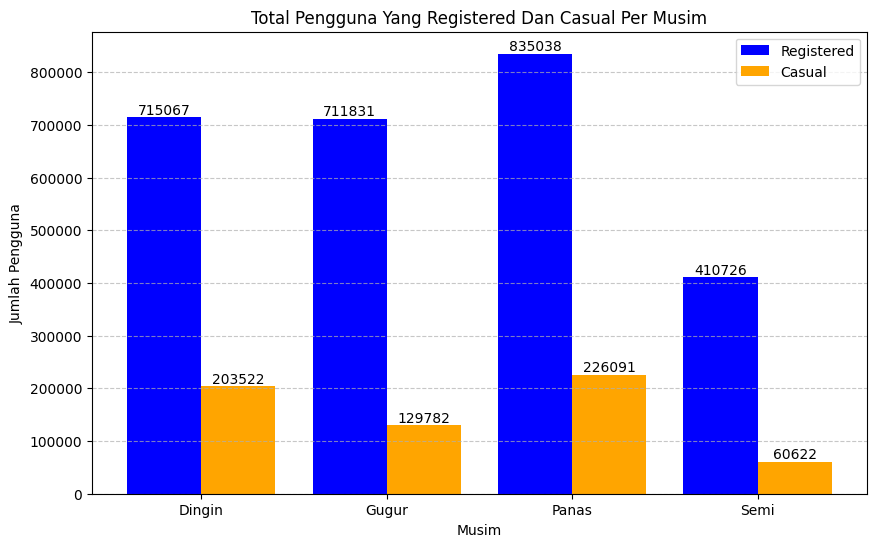

'Dilihat dari grafik di atas, jumlah pengguna sepeda yang Registered per musim dengan jumlah terbanyak berada di musim panas dengan total jumlah 835.038 dan yang paling sedikit di musim semi dengan jumlah 410.726. Adapun jumlah pengguna yang Casual tertinggi berada di musim semi yaitu dengan jumlah total 226.091 dan terendah di musim semi dengan jumlah 60.622.'

In [20]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(total_season))
bars1 = plt.bar(index, total_season['Registered'], bar_width, label='Registered', color='blue')
bars2 = plt.bar([i + bar_width for i in index], total_season['Casual'], bar_width, label='Casual', color='orange')

# Menambahkan nilai di atas chart
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, str(int(bar.get_height())), ha='center', va='bottom', color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, str(int(bar.get_height())), ha='center', va='bottom', color='black')

plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.title('Total Pengguna Yang Registered Dan Casual Per Musim')
plt.xticks([i + bar_width / 2 for i in index], total_season.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Penjelasan Pengguna Sepeda Yang Registered Dan Casual Setiap Musim
display("Dilihat dari grafik di atas, jumlah pengguna sepeda yang Registered per musim dengan jumlah terbanyak berada di musim panas dengan total jumlah 835.038 dan yang paling sedikit di musim semi dengan jumlah 410.726. Adapun jumlah pengguna yang Casual tertinggi berada di musim semi yaitu dengan jumlah total 226.091 dan terendah di musim semi dengan jumlah 60.622.")


## 4. Analisis Penyewa Sepeda Weekday Dan Weekend Per Musim

In [21]:
# Menghitung jumlah penyewa sepeda berdasarkan workingday dan season
summary = data.groupby(['season', 'workingday'])['cnt'].sum().unstack()

In [22]:
# Mengubah nama kolom
summary.columns = ['Weekend', 'Weekday']

display(summary)

,Weekend,Weekday
season,,
Dingin,287976,630613
Gugur,262554,579059
Panas,312056,749073
Semi,137683,333665


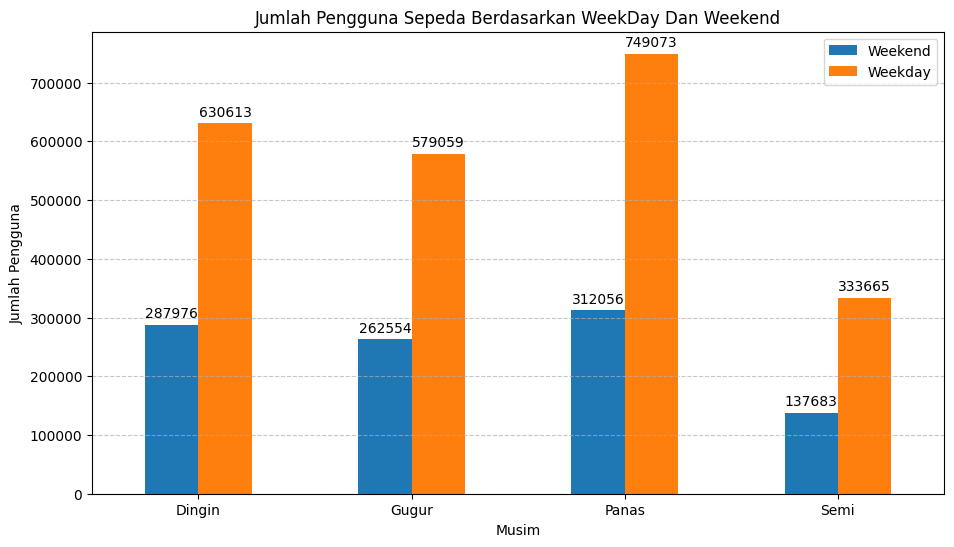

'Dilihat dari grafik diatas,jumlah pengguna tertingi di hari weekday berada di musim panas yaitu dengan total 749.073 dan yang terendah berada di musim semi dengan total 333.665, Adapun di hari weekend jumlah pengguna tertinggi berada di musim panas dengan jumlah 312.056 dan yang paling terendah berada di musim semi dengan total 137.683. '

In [23]:
# Membuat grafik
fig, ax = plt.subplots(figsize=(11, 6))
summary.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Pengguna Sepeda Berdasarkan WeekDay Dan Weekend')
ax.set_xlabel('Musim')  
ax.set_ylabel('Jumlah Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=0)  # Rotasi label sumbu X
ax.legend(['Weekend', 'Weekday'])

# Tambahkan label angka pada bar chart
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)
# Menampilkan grafik di Streamlit
plt.show()

 #Expander Grafik
display('Dilihat dari grafik diatas,jumlah pengguna tertingi di hari weekday berada di musim panas yaitu dengan total 749.073 dan yang terendah berada di musim semi dengan total 333.665, Adapun di hari weekend jumlah pengguna tertinggi berada di musim panas dengan jumlah 312.056 dan yang paling terendah berada di musim semi dengan total 137.683. ') 


## 5. Analisis Jumlah Pengguna Berdasarkan Cuaca

In [25]:
def create_weather_counts_sorted_df(df):
    # Mapping angka menjadi label kondisi cuaca
    CUACA = {
        1: 'Cerah, Sedikit Berawan, Seagian Berawan ',
        2: 'Kabut + Berawan, Kabut + awan Pecah, Kabut + Sedikit Berawan ',
        3: 'Saju Ringan, Hujan Ringan + Badai Petir + Awan Bertebaran ',
        4: 'Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut '
    }

    # Mengganti nilai angka weathersit dengan label kondisi cuaca
    df['CUACA'] = df['weathersit'].map(CUACA)

    # Menghitung total jumlah penyewaan sepeda untuk setiap kondisi cuaca
    weather_counts = df.groupby('CUACA')['cnt'].sum().reset_index().rename(columns={'cnt': 'JUMLAH'})

    # Mengurutkan DataFrame berdasarkan jumlah penyewaan sepeda
    weather_counts_sorted = weather_counts.sort_values(by='JUMLAH', ascending=False)
    
    return weather_counts_sorted


In [27]:
weather_counts_sorted = create_weather_counts_sorted_df(day_df)
display(weather_counts_sorted)

,CUACA,JUMLAH
0,"Cerah, Sedikit Berawan, Seagian Berawan",2257952
1,"Kabut + Berawan, Kabut + awan Pecah, Kabut + S...",996858
2,"Saju Ringan, Hujan Ringan + Badai Petir + Awan...",37869


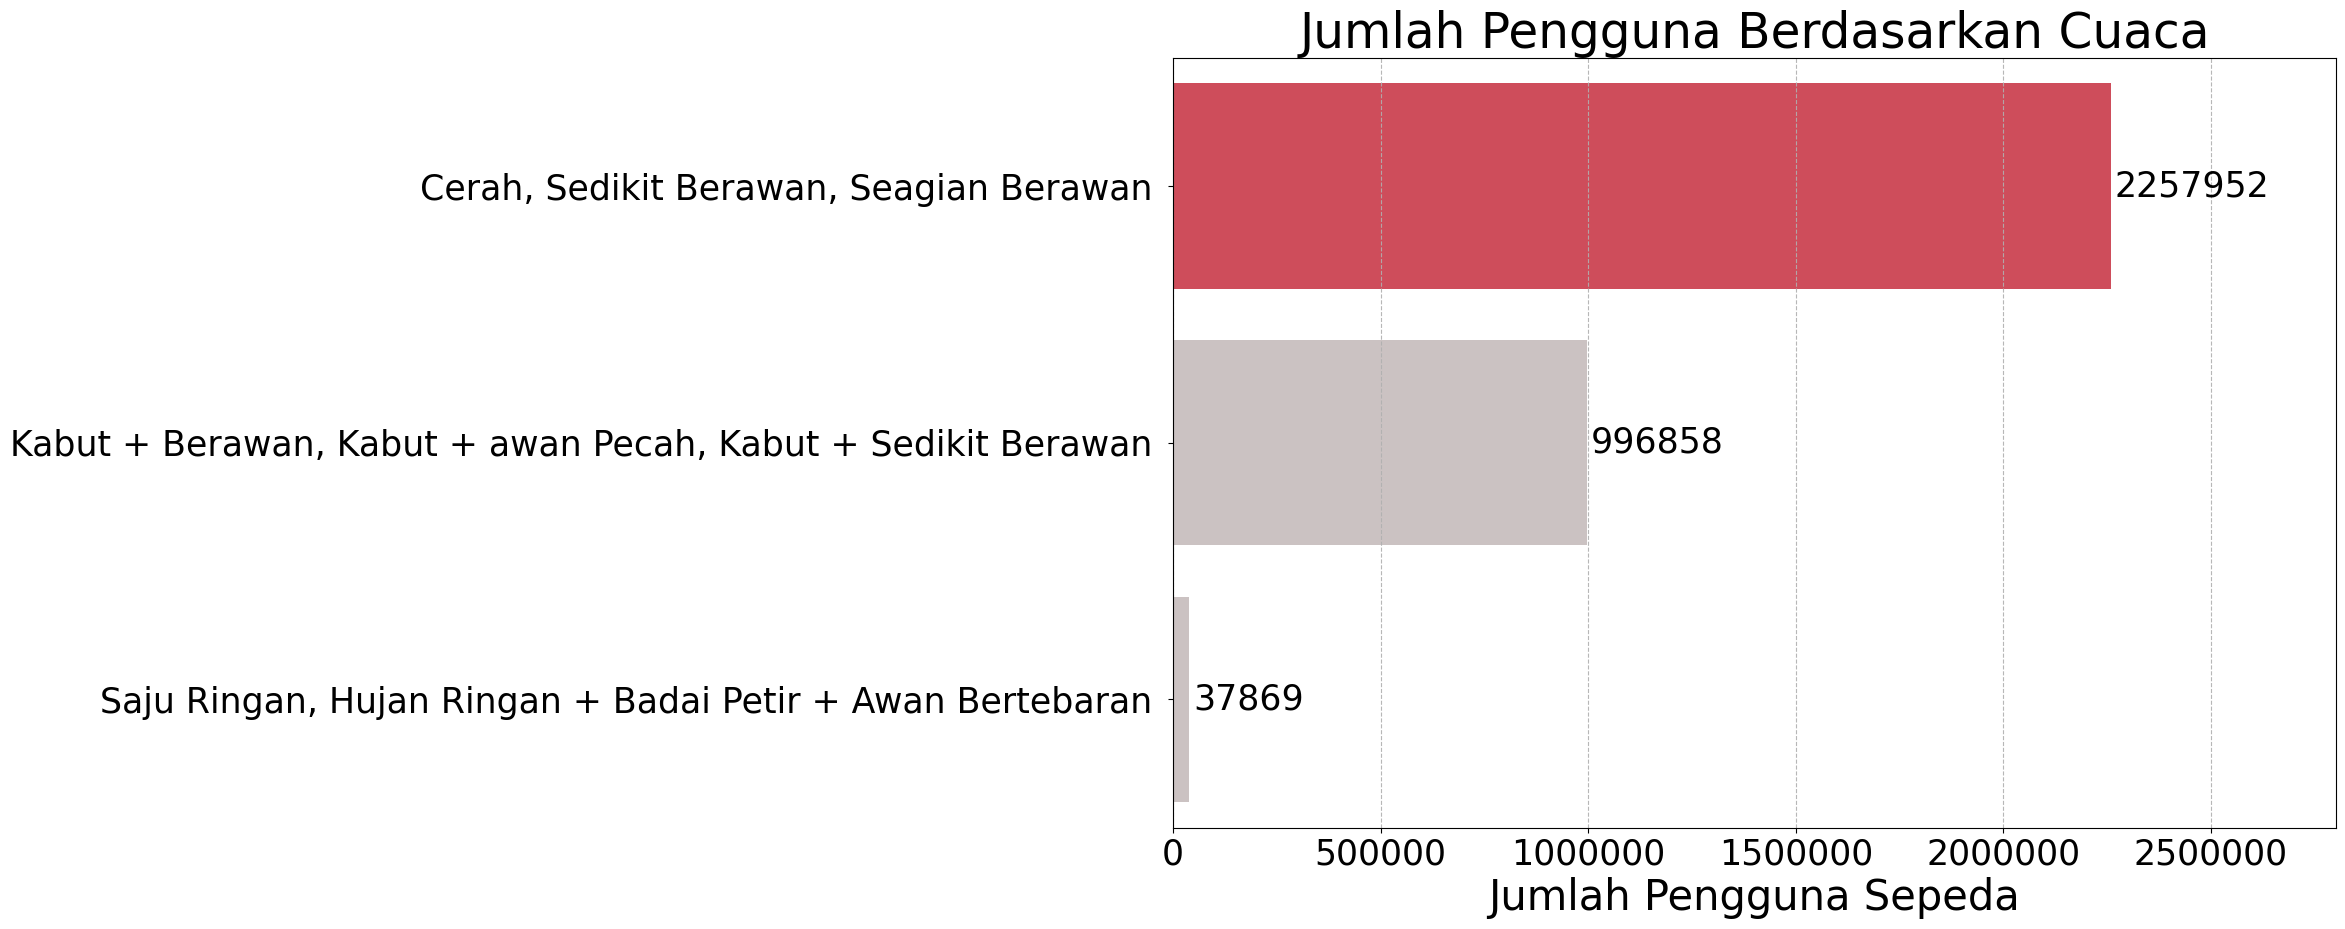

'Dilihat dari grafik diatas,jumlah pengguna sepeda tertingi berada di saat cuaca sedang Cerah, Sedikit Berawan, Sebagian Berawan dan tidak ada pengguna yang menyewa di saat cuaca sedang Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut  '

In [28]:
# Membuat bar plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=weather_counts_sorted, x='JUMLAH', y='CUACA', 
            hue='CUACA', palette=["#e3384a", "#cdc0c1", "#cdc0c1"], legend=False)

ax.set_xlabel('Jumlah Pengguna Sepeda', fontsize=30)
ax.set_ylabel(None)
ax.set_title('Jumlah Pengguna Berdasarkan Cuaca', fontsize=35)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.grid(axis='x', linestyle='--', alpha=0.9)

# Menyesuaikan tampilan sumbu X agar tidak menggunakan skala eksponensial
ax.set_xlim(0, 2800000)  # Set batas hingga 2.400.000
ax.set_xticks(range(0, 2800001, 500000))  # Buat ticks di 0, 600rb, 1.2jt, 1.8jt, 2.4jt
ax.ticklabel_format(style='plain', axis='x')  # Pastikan format angka biasa, bukan eksponensial


# Menambahkan label angka di tengah batang
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.0f", padding=3, fontsize=25, color="black")

plt.show()

# Expander Grafik
display('Dilihat dari grafik diatas,jumlah pengguna sepeda tertingi berada di saat cuaca sedang Cerah, Sedikit Berawan, Sebagian Berawan dan tidak ada pengguna yang menyewa di saat cuaca sedang Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut  ') 
   

## 6. Analisis Rata-rata Suhu pada 2011 dan 2012

In [33]:
data['dteday'] = pd.to_datetime(data['dteday'])  # Konversi kolom tanggal

data['year'] = data['dteday'].dt.year  # Ambil tahun dari tanggal
data['month'] = data['dteday'].dt.month  # Ambil bulan dari tanggal

# Denormalisasi suhu
data['temp_actual'] = data['temp'] * 41  # Mengonversi suhu ke skala sebenarnya

# Filter data untuk tahun 2011
df_2011 = data[data['year'] == 2011]
df_2012 = data[data['year'] == 2012]
avg_temp_2011 = df_2011.groupby('month')['temp_actual'].mean()
avg_temp_2012 = df_2012.groupby('month')['temp_actual'].mean()

In [34]:
comparison_df = pd.DataFrame({
    "Bulan": month_names,  # Menggunakan nama bulan
    "2011": avg_temp_2011.values, 
    "2012": avg_temp_2012.values
})

# Menampilkan tabel
display(comparison_df)

,Bulan,2011,2012
0,Jan,8.105974,11.282428
1,Feb,11.584143,12.928834
2,Mar,13.598330,18.425848
3,Apr,19.318726,19.221179
4,Mei,23.666480,25.106990
5,Jun,28.416417,27.679554
6,Jul,31.101588,30.846986
7,Agu,28.919847,29.183841
8,Sep,25.128349,25.423418
9,Okt,19.268996,20.502004


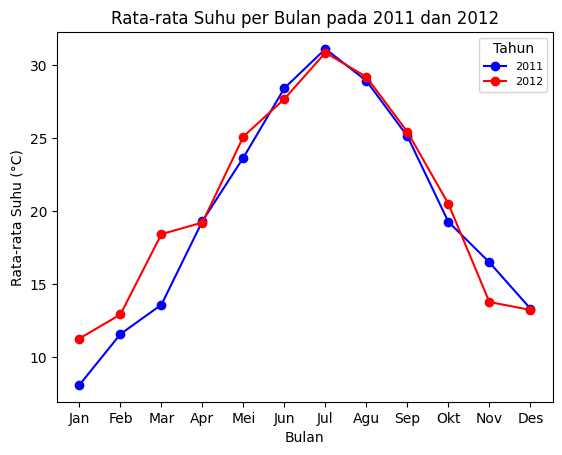

'Dilihat dari grafik diatas, Bahwa Suhu Tertinggi Terjadi Pada Juli Dengan Rata Rata 30 Derajat Celcius pada tahun 2011 Sedangkan Pada tahun 2012 Rata rata nya adalah 31 Derajat Celcius. Dan Suhu Terendah terjadi Pada Bulan Januari dengan rata-rata adalah 8 Derajat Celcius Pada Tahun 2011 Sedangkan Pada tahun 2012 rata rata nya adalah 11 Derajat Celcius'

In [35]:
# Plot rata-rata suhu per bulan
fig, ax = plt.subplots()
ax.plot(avg_temp_2011.index, avg_temp_2011.values, marker='o', linestyle='-', color='blue', label="2011")
ax.plot(avg_temp_2012.index, avg_temp_2012.values, marker='o', linestyle='-', color='red', label="2012")
ax.set_xlabel("Bulan")
ax.set_ylabel("Rata-rata Suhu (°C)")
ax.set_title("Rata-rata Suhu per Bulan pada 2011 dan 2012")
legend = ax.legend(title="Tahun", loc="upper right", fontsize=8)
legend.get_title()
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
plt.show()

 # Expander Grafik
display('Dilihat dari grafik diatas, Bahwa Suhu Tertinggi Terjadi Pada Juli Dengan Rata Rata 30 Derajat Celcius pada tahun 2011 Sedangkan Pada tahun 2012 Rata rata nya adalah 31 Derajat Celcius. Dan Suhu Terendah terjadi Pada Bulan Januari dengan rata-rata adalah 8 Derajat Celcius Pada Tahun 2011 Sedangkan Pada tahun 2012 rata rata nya adalah 11 Derajat Celcius')

## 7. Analisis Rata-rata Windspeed pada 2011 dan 2012 berdasarkan Bulan

In [36]:
data['dteday'] = pd.to_datetime(data['dteday'])  # Konversi kolom tanggal

data['year'] = data['dteday'].dt.year  # Ambil tahun dari tanggal
data['month'] = data['dteday'].dt.month  # Ambil bulan dari tanggal

# Denormalisasi windspeed
data['windspeed_actual'] = data['windspeed'] * 67  # Mengonversi windspeed ke skala sebenarnya

# Filter data untuk tahun 2011 dan 2012
df_2011 = data[data['year'] == 2011]
df_2012 = data[data['year'] == 2012]
avg_windspeed_2011 = df_2011.groupby('month')['windspeed_actual'].mean()
avg_windspeed_2012 = df_2012.groupby('month')['windspeed_actual'].mean()

In [37]:
# Gabungkan data untuk tahun 2011 dan 2012
comparison_df = pd.DataFrame({
    "Bulan": month_names,  # Menggunakan nama bulan
    "2011": avg_windspeed_2011.values, 
    "2012": avg_windspeed_2012.values
})

# Menampilkan tabel
display(comparison_df)

,Bulan,2011,2012
0,Jan,13.093060,14.551511
1,Feb,15.314059,13.617355
2,Mar,15.571321,14.270404
3,Apr,16.362499,15.058121
4,Mei,12.145379,12.375138
5,Jun,11.939090,12.907177
6,Jul,11.501716,10.750167
7,Agu,12.778276,10.392756
8,Sep,10.250290,11.986356
9,Okt,11.770932,11.706602


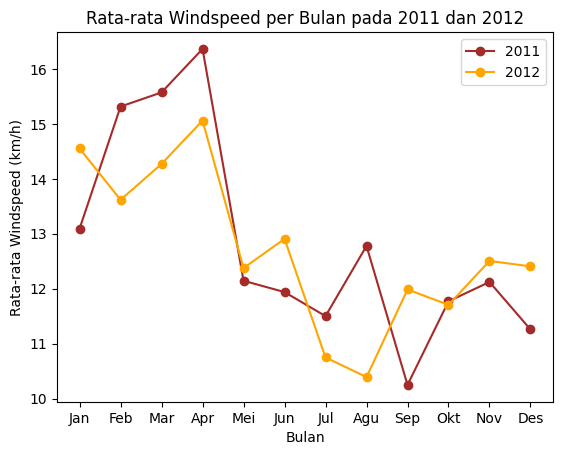

'Dilihat dari grafik diatas, bahwa Kecepatan Angin Tertinggi Pada tahun 2011 dan 2012 terjadi pada Bulan April Dengan Rata-rata 16 Kilometer / jam pada tahun 2011 dan 15 Kilometer / jam pada tahun 2012. dan Kecepatan Angin Terendah Pada Tahun 2011 Terjadi Pada Bulan September Yaitu 10 kilometer / jam. sedangkan pada tahun 2012 terjadi pada bulan agustus dengan rata rata 10 kilometer / jam'

In [38]:
# Plot rata-rata windspeed per bulan
fig, ax = plt.subplots()
ax.plot(avg_windspeed_2011.index, avg_windspeed_2011.values, marker='o', linestyle='-', color='brown', label="2011")
ax.plot(avg_windspeed_2012.index, avg_windspeed_2012.values, marker='o', linestyle='-', color='orange', label="2012")
ax.set_xlabel("Bulan")
ax.set_ylabel("Rata-rata Windspeed (km/h)")
ax.set_title("Rata-rata Windspeed per Bulan pada 2011 dan 2012")
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
ax.legend()

plt.show()

# Expander Grafik
display('Dilihat dari grafik diatas, bahwa Kecepatan Angin Tertinggi Pada tahun 2011 dan 2012 terjadi pada Bulan April Dengan Rata-rata 16 Kilometer / jam pada tahun 2011 dan 15 Kilometer / jam pada tahun 2012. dan Kecepatan Angin Terendah Pada Tahun 2011 Terjadi Pada Bulan September Yaitu 10 kilometer / jam. sedangkan pada tahun 2012 terjadi pada bulan agustus dengan rata rata 10 kilometer / jam')